In [4]:
import pandas as pd

# Load the dataset
wi91act = pd.read_csv('/content/1991_92_11_activities.csv')

# Calculate the column means
p91 = wi91act.mean()

# Scale by 100 and round to the nearest integer
p91_scaled_rounded = (100 * p91).round(0).astype(int)

# Display the results
print(p91_scaled_rounded)



alpine skiing           71
cross-country skiing    18
ski touring              9
ice-skating              6
sleigh riding           16
hiking                  30
relaxing                51
shopping                25
sight-seeing            11
museums                  6
pool/sauna              30
dtype: int64


In [6]:
import pandas as pd

# Load the second dataset
wi97act = pd.read_csv('/content/1997_98_11_activities.csv')

# Select only numeric columns
wi97act_numeric = wi97act.select_dtypes(include=[float, int])

# Calculate the column means
p97 = wi97act_numeric.mean()

# Scale by 100 and round to the nearest integer
p97_scaled_rounded = (100 * p97).round(0).astype(int)

# Display the results
print(p97_scaled_rounded)


alpine skiing           68
cross-country skiing     9
ski touring              3
ice-skating              5
sleigh riding           14
hiking                  29
relaxing                74
shopping                55
sight-seeing            30
museums                 14
pool/sauna              47
dtype: int64


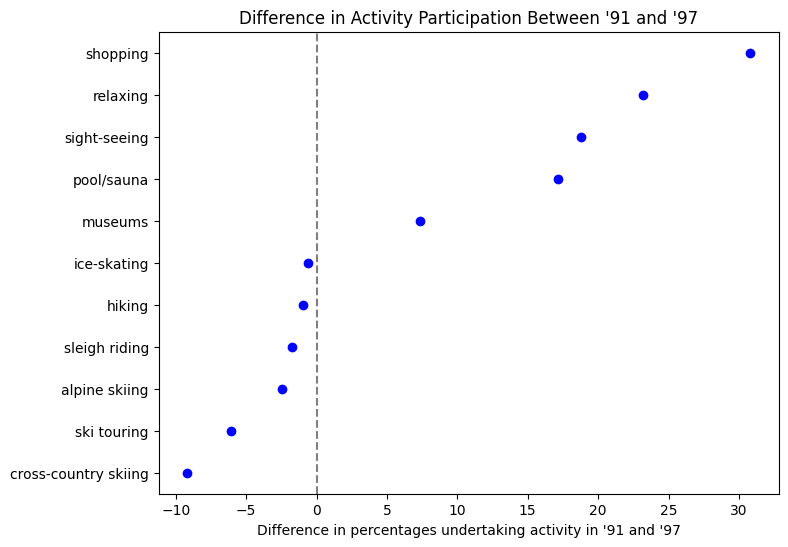

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the '91 and '97 datasets (replace with actual paths)
wi91act = pd.read_csv('/content/1991_92_11_activities.csv')
wi97act = pd.read_csv('/content/1997_98_11_activities.csv')

# Select only numeric columns and calculate the column means
p91 = wi91act.select_dtypes(include=[float, int]).mean()
p97 = wi97act.select_dtypes(include=[float, int]).mean()

# Calculate the differences, scale by 100, and sort them
differences = 100 * (p97 - p91)
differences_sorted = differences.sort_values()

# Plot the dot chart
plt.figure(figsize=(8, 6))
plt.plot(differences_sorted, range(len(differences_sorted)), 'o', color='blue')
plt.axvline(x=0, color='gray', linestyle='--')  # Add a vertical line at x=0
plt.yticks(range(len(differences_sorted)), differences_sorted.index)
plt.xlabel("Difference in percentages undertaking activity in '91 and '97")
plt.title("Difference in Activity Participation Between '91 and '97")
plt.show()


In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the dataset
wi91act = pd.read_csv('/content/1991_92_11_activities.csv')

# Select only numeric columns for clustering
wi91act_numeric = wi91act.select_dtypes(include=[float, int])

# Set the random seed for reproducibility
np.random.seed(1234)

# Define the number of clusters and repetitions
k = 6
n_reps = 20

# Perform clustering multiple times and keep track of the best result
best_inertia = np.inf
best_kmeans = None

for _ in range(n_reps):
    kmeans = KMeans(n_clusters=k, random_state=np.random.randint(0, 10000))
    kmeans.fit(wi91act_numeric)

    # Keep the clustering with the lowest inertia
    if kmeans.inertia_ < best_inertia:
        best_inertia = kmeans.inertia_
        best_kmeans = kmeans

# The best clustering model after 20 repetitions
wi91act['Cluster'] = best_kmeans.labels_

# Display the number of points in each cluster
cluster_counts = wi91act['Cluster'].value_counts().sort_index()
print("Cluster sizes:")
print(cluster_counts)

# Display cluster centers
cluster_centers = pd.DataFrame(best_kmeans.cluster_centers_, columns=wi91act_numeric.columns)
print("\nCluster centers:")
print(cluster_centers)


Cluster sizes:
Cluster
0    816
1    237
2    505
3    483
4    397
5    440
Name: count, dtype: int64

Cluster centers:
   alpine skiing  cross-country skiing  ski touring  ice-skating  \
0   9.289216e-01              0.099265     0.101716     0.031863   
1   9.704641e-02              0.101266     0.004219     0.016878   
2   2.109424e-15              0.376238     0.017822     0.031683   
3   9.565217e-01              0.186335     0.122153     0.111801   
4   8.790932e-01              0.176322     0.138539     0.108312   
5   1.000000e+00              0.152273     0.095455     0.050000   

   sleigh riding    hiking      relaxing      shopping  sight-seeing  \
0       0.118873  0.110294 -9.992007e-15  1.311275e-01      0.018382   
1       0.054852  0.468354  4.135021e-01  3.459916e-01      0.957806   
2       0.067327  0.619802  6.950495e-01  1.386139e-01      0.005941   
3       0.262940  0.213251  3.768116e-01  1.097308e-01      0.049689   
4       0.277078  0.377834  9.874055e-01  

<ipython-input-9-05aca655147c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="Blues")


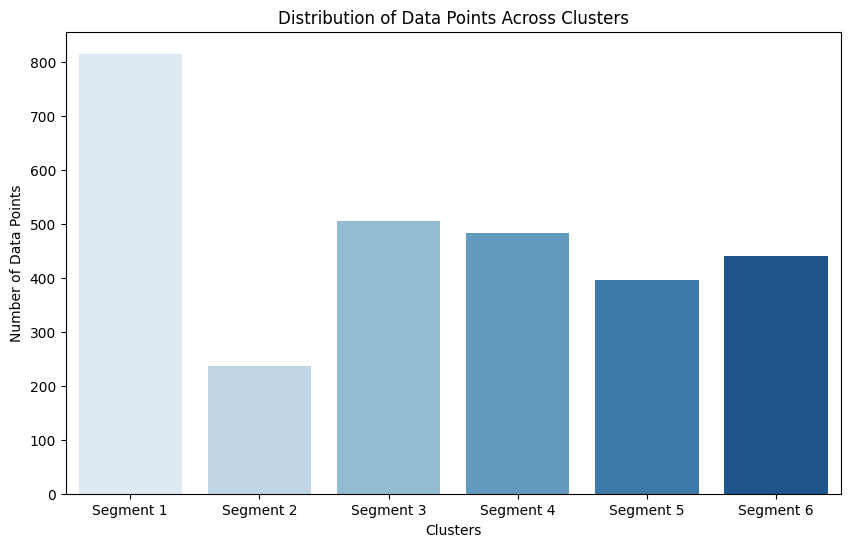

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `wi91act` DataFrame has been clustered and has a 'Cluster' column
# Get the count of data points in each cluster
cluster_counts = wi91act['Cluster'].value_counts().sort_index()
cluster_counts.index = [f"Segment {i+1}" for i in cluster_counts.index]  # Adding "Segment" prefix

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="Blues")
plt.xlabel("Clusters")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Data Points Across Clusters")
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load both datasets
wi91act = pd.read_csv('/content/1991_92_11_activities.csv')
wi97act = pd.read_csv('/content/1997_98_11_activities.csv')

# Select only numeric columns for clustering
wi91act_numeric = wi91act.select_dtypes(include=[float, int])
wi97act_numeric = wi97act.select_dtypes(include=[float, int])

# Set random seed and define the number of clusters
np.random.seed(1234)
k = 6

# Perform clustering on wi91act data
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(wi91act_numeric)
size91 = pd.Series(kmeans.labels_).value_counts().sort_index()

# Predict clusters for wi97act data using the trained model
labels_97 = kmeans.predict(wi97act_numeric)
size97 = pd.Series(labels_97).value_counts().sort_index()

# Combine the sizes into a DataFrame and calculate row-wise proportions
size_df = pd.DataFrame({'size91': size91, 'size97': size97}).fillna(0)
proportions = size_df.apply(lambda x: x / x.sum() * 100, axis=1).round(0)

# Display the proportions as percentages
print("Proportions (in percentages) for each cluster in '91 and '97:")
print(proportions)


Proportions (in percentages) for each cluster in '91 and '97:
   size91  size97
0    73.0    27.0
1    51.0    49.0
2    34.0    66.0
3    50.0    50.0
4    27.0    73.0
5    59.0    41.0


In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency

# Load both datasets
wi91act = pd.read_csv('/content/1991_92_11_activities.csv')
wi97act = pd.read_csv('/content/1997_98_11_activities.csv')

# Select only numeric columns for clustering
wi91act_numeric = wi91act.select_dtypes(include=[float, int])
wi97act_numeric = wi97act.select_dtypes(include=[float, int])

# Set random seed and define the number of clusters
np.random.seed(1234)
k = 6

# Perform clustering on wi91act data
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(wi91act_numeric)
size91 = pd.Series(kmeans.labels_).value_counts().sort_index()

# Predict clusters for wi97act data using the trained model
labels_97 = kmeans.predict(wi97act_numeric)
size97 = pd.Series(labels_97).value_counts().sort_index()

# Combine the sizes into a contingency table
contingency_table = pd.DataFrame({'size91': size91, 'size97': size97}).fillna(0).to_numpy()

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the test results
print("Chi-squared test results:")
print(f"X-squared = {chi2:.2f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p:.2e}")


Chi-squared test results:
X-squared = 656.32
Degrees of freedom = 5
P-value = 1.36e-139


In [12]:
pip install statsmodels


<Figure size 1000x600 with 0 Axes>

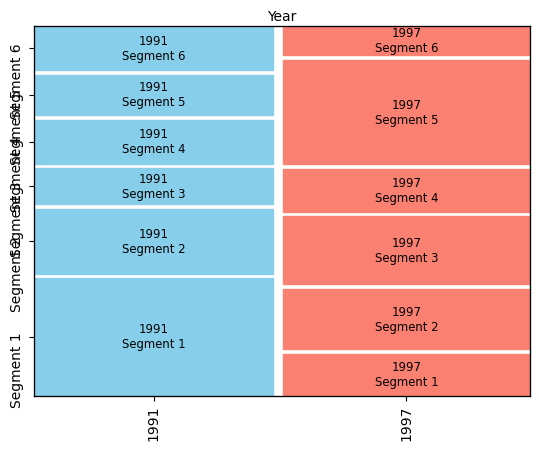

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Load both datasets
wi91act = pd.read_csv('/content/1991_92_11_activities.csv')
wi97act = pd.read_csv('/content/1997_98_11_activities.csv')

# Select only numeric columns for clustering
wi91act_numeric = wi91act.select_dtypes(include=[float, int])
wi97act_numeric = wi97act.select_dtypes(include=[float, int])

# Set random seed and define the number of clusters
np.random.seed(1234)
k = 6

# Perform clustering on wi91act data
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(wi91act_numeric)
size91 = pd.Series(kmeans.labels_).value_counts().sort_index()

# Predict clusters for wi97act data using the trained model
labels_97 = kmeans.predict(wi97act_numeric)
size97 = pd.Series(labels_97).value_counts().sort_index()

# Prepare the data in a suitable format for mosaic plot
mosaic_data = {
    ('1991', f'Segment {i+1}'): size91.get(i, 0) for i in range(k)
}
mosaic_data.update({
    ('1997', f'Segment {i+1}'): size97.get(i, 0) for i in range(k)
})

# Plot the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(mosaic_data, title='', label_rotation=90, gap=0.02, properties=lambda key: {'color': 'skyblue' if key[0] == '1991' else 'salmon'})
plt.ylabel("Segment")
plt.xlabel("Year")
plt.show()


In [14]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the datasets
wi91act = pd.read_csv('/content/1991_92_11_activities.csv')
wi97act = pd.read_csv('/content/1997_98_11_activities.csv')

# Select only numeric columns for clustering
wi91act_numeric = wi91act.select_dtypes(include=[float, int])
wi97act_numeric = wi97act.select_dtypes(include=[float, int])

# Set number of clusters and random seed
k = 6

# Train KMeans on wi91act data
kmeans_wi91 = KMeans(n_clusters=k, random_state=1234)
kmeans_wi91.fit(wi91act_numeric)

# Get the centroids learned from wi91act
centroids_wi91 = kmeans_wi91.cluster_centers_

# Use these centroids to initialize KMeans and apply it to wi97act without retraining
kmeans_wi97 = KMeans(n_clusters=k, init=centroids_wi91, n_init=1, max_iter=1, random_state=1234)
wi97act['Cluster'] = kmeans_wi97.fit_predict(wi97act_numeric)

# Display the assigned clusters for wi97act
print(wi97act[['Cluster']].value_counts().sort_index())


Cluster
0          353
1          595
2          534
3          337
4          831
5          311
Name: count, dtype: int64


<ipython-input-15-25e641fd612d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="Blues")


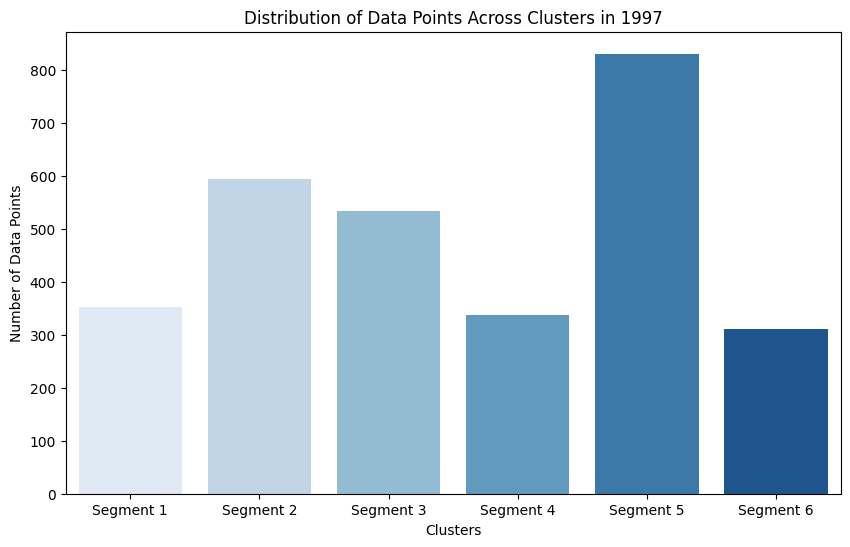

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `wi97act` DataFrame has a 'Cluster' column with cluster assignments
# Count the number of data points in each cluster
cluster_counts = wi97act['Cluster'].value_counts().sort_index()
cluster_counts.index = [f"Segment {i+1}" for i in cluster_counts.index]  # Adding "Segment" prefix

# Plot the bar chart with shading
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="Blues")
plt.xlabel("Clusters")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Data Points Across Clusters in 1997")
plt.show()
